## Sumbit example

In [3231]:
import pandas as pd
import numpy as np

In [3232]:
DATA_PATH = "/home/arnemkova/ML_labs/lab2/train.csv"

Посмотрим на табличку)

In [3233]:
data = pd.read_csv(DATA_PATH)
df = data.copy()
df.head()

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


Теперь посмотрим чё там по данным внутри

In [3234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8000 non-null   int64  
 1   category               8000 non-null   object 
 2   clicks                 7727 non-null   float64
 3   likes                  7624 non-null   float64
 4   buys                   8000 non-null   int64  
 5   4xx_errors             8000 non-null   int64  
 6   5xx_errors             8000 non-null   int64  
 7   complaints_count       7527 non-null   object 
 8   average_dwelltime      8000 non-null   float64
 9   source_attractiveness  8000 non-null   float64
 10  date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 687.6+ KB


Посмотрим на статические характеристики

In [3235]:
df.describe()

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,average_dwelltime,source_attractiveness
count,8000.000000,7.727000e+03,7.624000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000
mean,5006.138875,2.749785e+06,5.985027e+05,5.810509e+05,8.204958e+04,2.769224e+04,6.979549,0.191997
std,2893.886162,4.699120e+06,1.978345e+06,2.262221e+06,1.555219e+05,7.946935e+04,10.004924,0.227873
min,0.000000,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-0.681718
25%,2493.250000,3.599210e+05,0.000000e+00,0.000000e+00,2.943000e+03,0.000000e+00,1.503928,0.038220
50%,5035.000000,1.097221e+06,3.399550e+04,0.000000e+00,2.671750e+04,0.000000e+00,4.022802,0.154256
75%,7521.250000,2.915358e+06,2.860638e+05,0.000000e+00,9.500225e+04,2.016375e+04,8.899400,0.282510
max,9999.000000,6.203206e+07,5.582181e+07,4.277391e+07,2.904996e+06,1.865588e+06,211.218066,1.355736


Имеется столбец "Unnemed: 0" он нам не нужен - дропаем его

In [3236]:
df = df.drop("Unnamed: 0", axis=1)

Видим, что столбцы "clicks", "likes" содержат NaN значения, а столбец "complaints_count" содержит значения "-". Удалим их.

Приведем все к целочисленному типу.

Преобразуем столбец "date_of_registration", пострим из него признак, отвечающий за возраст домена

In [3237]:
def clean_data(data) :
    dt = data.copy()
    dt["complaints_count"] = dt["complaints_count"].replace("-", np.nan)
    dt["complaints_count"] = pd.to_numeric(dt["complaints_count"])
    
    dt["average_dwelltime"] = dt["average_dwelltime"].replace(-1, np.nan)
    
    dt = dt.dropna()
    
    dt["clicks"] = dt["clicks"].astype(np.int64)
    dt["likes"] = dt["likes"].astype(np.int64)
    dt["complaints_count"] = dt["complaints_count"].astype(np.int64)
    
    dt["date_of_registration"] = pd.to_datetime(dt["date_of_registration"])
    dt["domen_age"] = (pd.Timestamp('now') - dt["date_of_registration"]) / pd.Timedelta(days=365)
    dt = dt.drop("date_of_registration", axis=1)
    
    return dt

df = clean_data(df)

In [3238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6229 entries, 1 to 7998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               6229 non-null   object 
 1   clicks                 6229 non-null   int64  
 2   likes                  6229 non-null   int64  
 3   buys                   6229 non-null   int64  
 4   4xx_errors             6229 non-null   int64  
 5   5xx_errors             6229 non-null   int64  
 6   complaints_count       6229 non-null   int64  
 7   average_dwelltime      6229 non-null   float64
 8   source_attractiveness  6229 non-null   float64
 9   domen_age              6229 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 535.3+ KB


In [3239]:
import matplotlib.pyplot as plt
import seaborn as sns

Посмотрим на распределение привлекательности

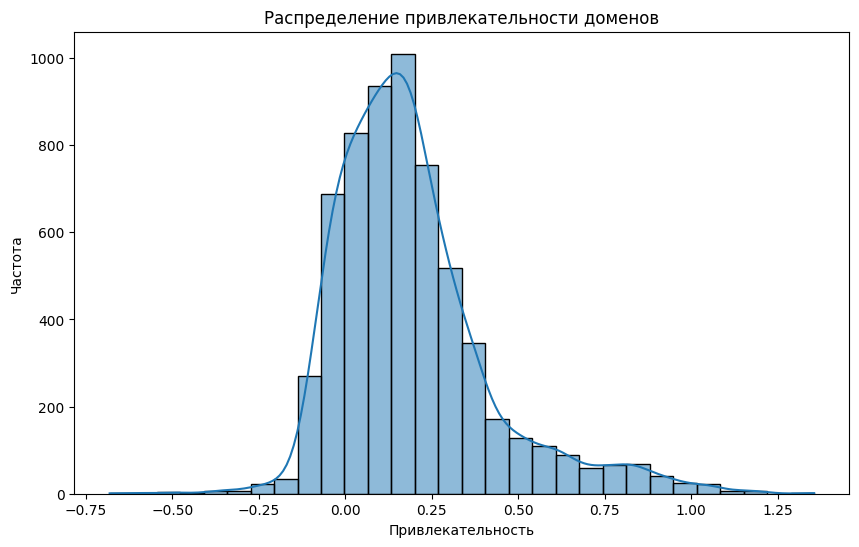

In [3240]:
plt.figure(figsize=(10, 6))
sns.histplot(df["source_attractiveness"], bins=30, kde=True)
plt.title("Распределение привлекательности доменов")
plt.xlabel("Привлекательность")
plt.ylabel("Частота")
plt.show()

Посмотри на зависимость привлекательности домена от различных признаков

<Figure size 1200x800 with 0 Axes>

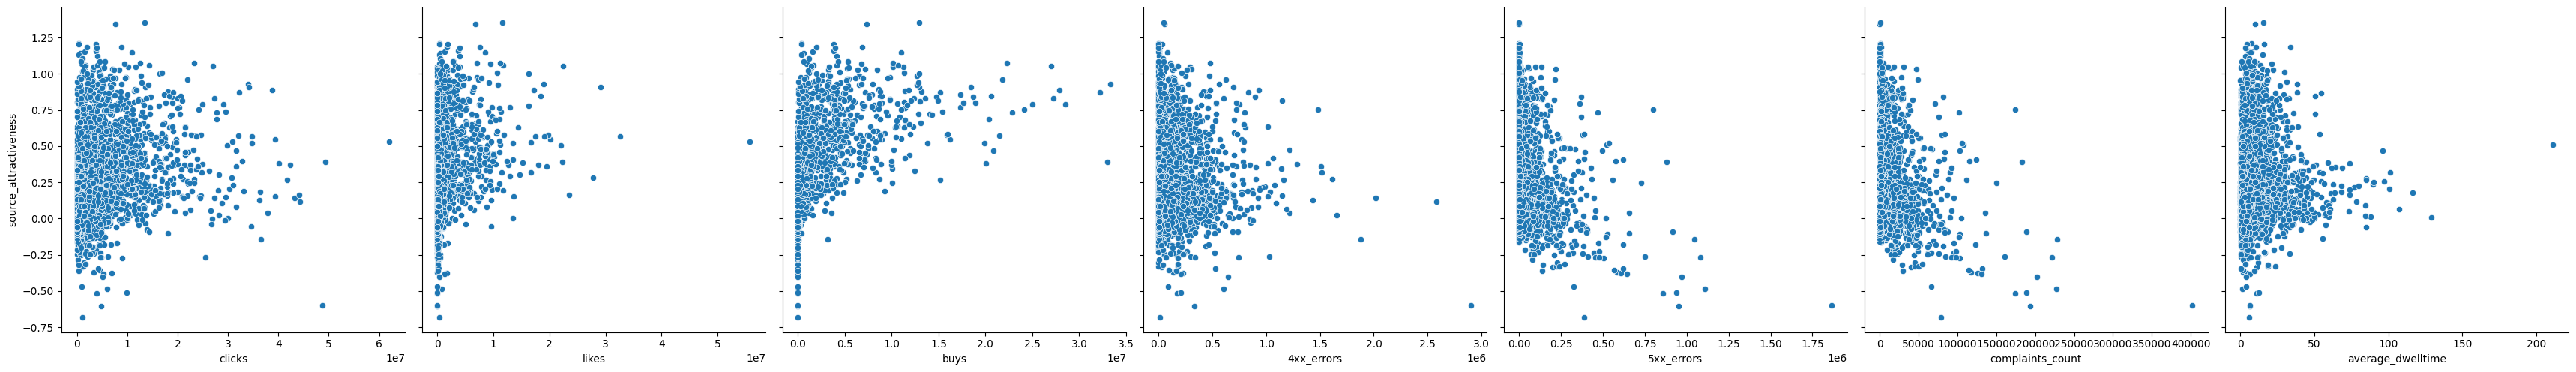

In [3241]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=["clicks", "likes", "buys", "4xx_errors", "5xx_errors", "complaints_count", "average_dwelltime"], y_vars=["source_attractiveness"], height=5)
plt.show()

Посмотрим на распределения признаков

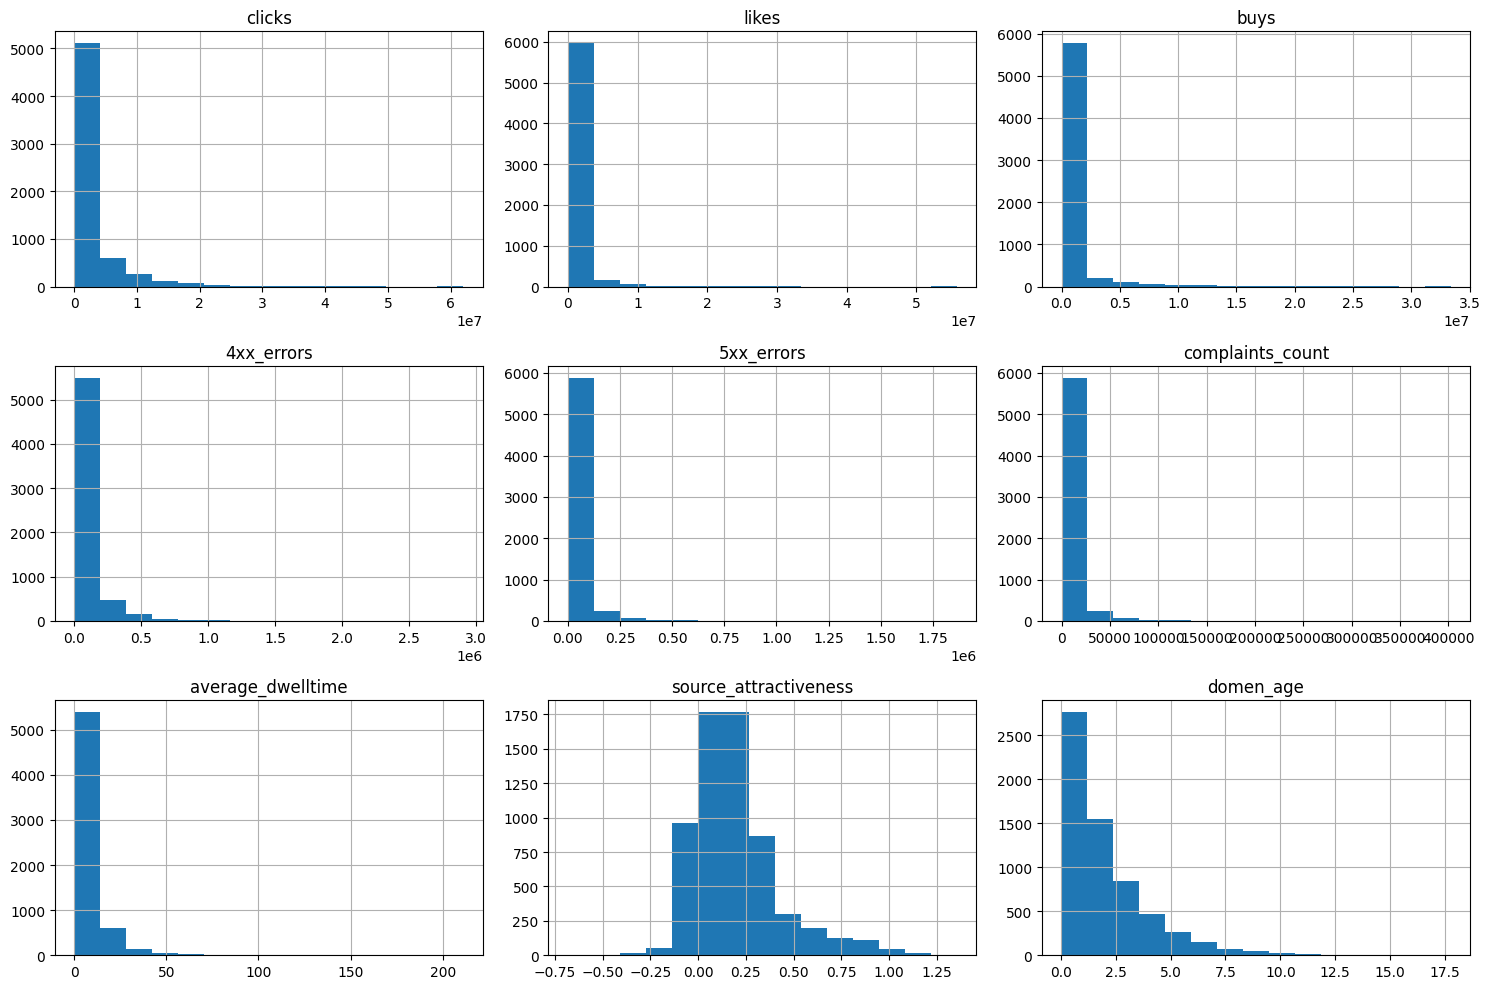

In [3242]:
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

Посмотрим на выбросы

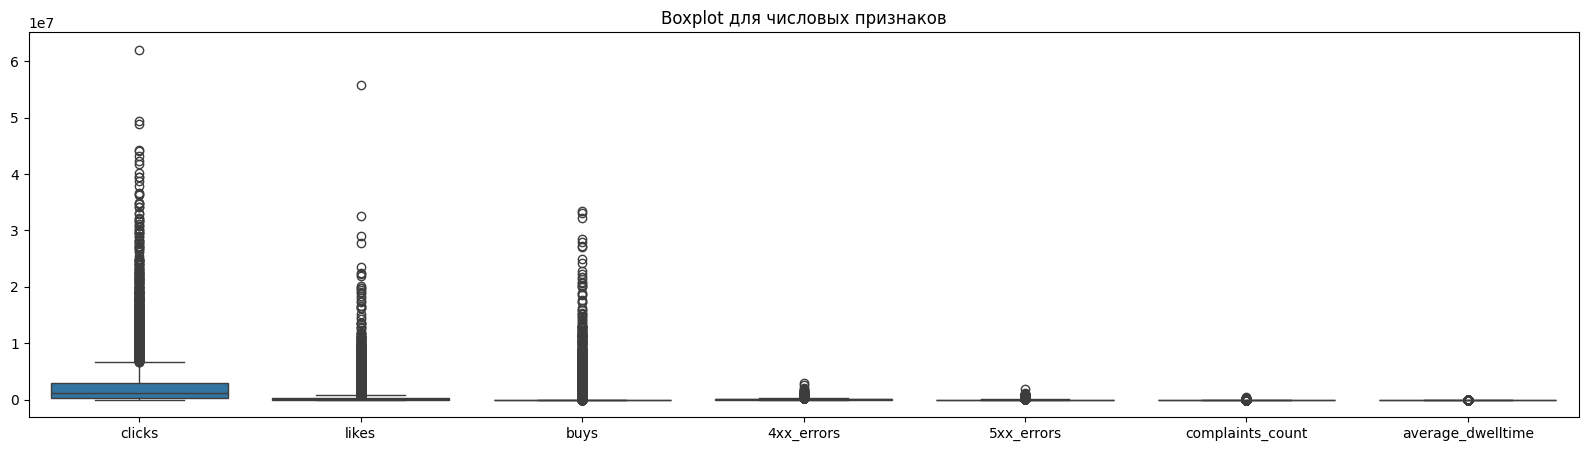

In [3243]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df[["clicks", "likes", "buys", "4xx_errors", "5xx_errors", "complaints_count", "average_dwelltime"]])
plt.title("Boxplot для числовых признаков")
plt.show()


Удалим выбросы

In [3244]:
def remove_outliers(data):
    dt = data.copy()
    for column in dt.select_dtypes(include=np.number).columns:
        per5 = dt[column].quantile(0.05)
        per95 = dt[column].quantile(0.95)
        
        dt = dt[(dt[column] >= per5) & (dt[column] <= per95)]
    
    return dt

df = remove_outliers(df)

Снова посмотрим на выбросы

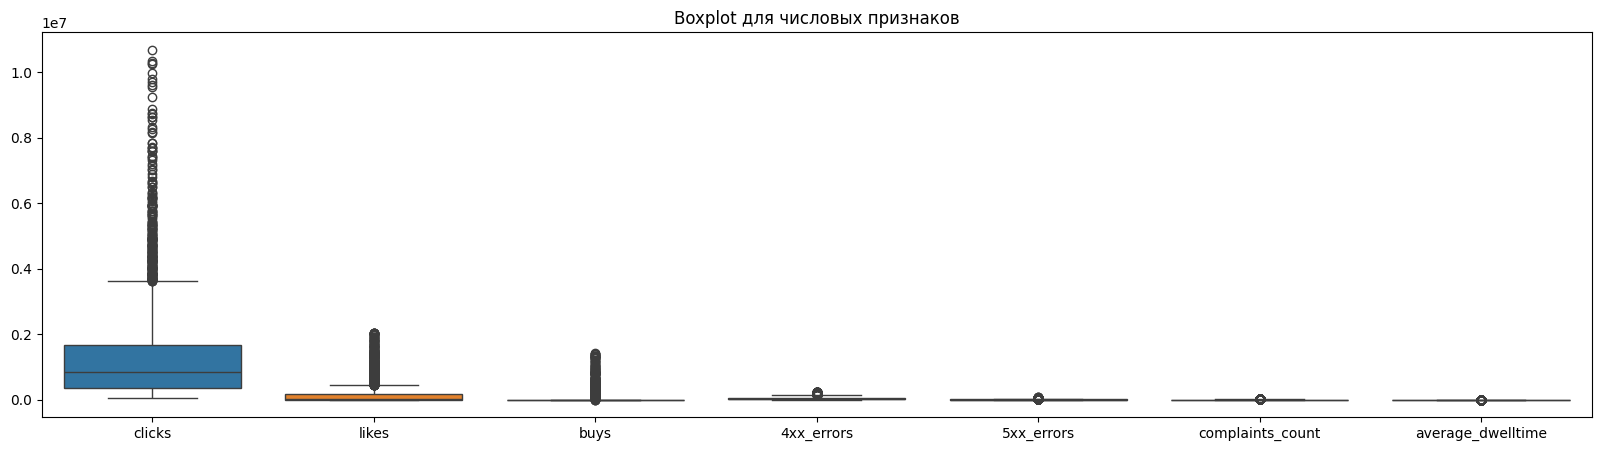

In [3245]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df[["clicks", "likes", "buys", "4xx_errors", "5xx_errors", "complaints_count", "average_dwelltime"]])
plt.title("Boxplot для числовых признаков")
plt.show()


In [3246]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [3247]:
def prepcessing_data(data, is_train, encoder) :
    dt = data.copy()
    
    # Выделим категории признаков
    categorial_features = ["category"]
    real_features = ["clicks", "likes", "buys", "4xx_errors", "5xx_errors", "complaints_count", "average_dwelltime", "domen_age"]
    
    if is_train :
        X = dt.drop("source_attractiveness", axis=1)
        y = dt["source_attractiveness"]
        
        # Разделим на тестовые и обучающие выборки
        X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=dt["category"]
    )
    else :
        X = dt
        
    #Кодируем категории
    if is_train and encoder == None:
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        X_train_cat = encoder.fit_transform(X_train[categorial_features])
        X_train = np.hstack((X_train_cat, X_train[real_features].values))
        X_test_cat = encoder.transform(X_test[categorial_features])
        X_test = np.hstack((X_test_cat, X_test[real_features].values))
        return X_train, X_test, y_train, y_test, encoder
    else :
        X_test_cat = encoder.transform(X[categorial_features])
        X = np.hstack((X_test_cat, X[real_features].values))
        return X
        

Теперь приступим к обучению

In [3248]:
def train_data(X_train, y_train) :
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [3249]:
def prediction(model, X_test) :
    
    y_pred = model.predict(X_test)
    
    return y_pred

In [3250]:
X_train, X_test, y_train, y_test, encoder = prepcessing_data(df, is_train=True, encoder=None)

model = train_data(X_train, y_train)

print("Model coef: ", model.coef_)

y_pred = prediction(model, X_test)

Model coef:  [-4.11854184e-02 -5.49383851e-02 -8.43782387e-02 -8.05036492e-02
 -1.62864365e-08  1.12422720e-07  1.82627840e-07 -1.77840163e-08
 -1.04248234e-06 -1.07936147e-06  2.77493684e-03  6.03469661e-02]


In [3251]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


MSE: 0.002969051931335248
R²: 0.767186814548602


In [3252]:
train_preds = prediction(model, X_train)

print(mean_squared_error(y_train, train_preds))

0.0030520536633289927


## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [3253]:
def predict(DATA_PATH):
    data = pd.read_csv(DATA_PATH)
    
    data = clean_data(data)
    data = remove_outliers(data)
    
    X = prepcessing_data(data, is_train=False, encoder=encoder)
    predicts = prediction(model, X)
    
    data = {
        "source_attractiveness": predicts
    }
    submit = pd.DataFrame(data)
    submit.index.name = "ID" 
    submit.to_csv("submission.csv", index=True, sep=';')
            
DATA_PATH = "/home/arnemkova/ML_labs/lab2/test.csv"
predict(DATA_PATH)